# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`

Linear regression is implemented by gradient descent algorithm. We will first split the data into train and test sets. We will then implement the algorithm with one hyperparamter i.e number of epochs and one parameter i.e learning rate using the matrix method. First, I will fix the number of iterations and find the learning rate which produces lowest RMSE. After that I will vary number of epochs. 

In [3]:
x_train = np.array(x_train)
x = np.c_[np.ones(x_train.shape[0]),x_train] # accounting for bias term
x_test = np.array(x_test)
x_test_b = np.c_[np.ones(x_test.shape[0]),x_test] # accounting for bias term
y = np.array(y_train)
y_test = np.array(y_test)

In [4]:
print(x.shape,y.shape,x_test_b.shape,y_test.shape)

(240, 26) (240,) (60, 26) (60,)


In [5]:
n = x.shape[0]
d = x.shape[1]
print(n,d)

240 26


In [6]:
def prediction(x,w):
    return np.matmul(x,w)

def error(x,y,w):
    return prediction(x,w) - y

def rmse(x,y,w,n):
    e = error(x,y,w)
    return (np.matmul(e.T,e)/n)**0.5

In [7]:
# 1.3.1.2
# implement Linear Regression

def linear_regression(epochs,k):
    w = np.zeros(d)

    history_rmse = np.zeros(epochs+1)
    history_rmse[0] = rmse(x,y,w,n)

    for i in range(epochs):
        gradient =  np.matmul(x.T,error(x,y,w))
        w = w - k * gradient
        history_rmse[i+1] = rmse(x,y,w,n)
    
    return w,history_rmse

In [8]:
def learning_rates_try(ks):
    rmse_final = []

    for k in ks:

        w,history = linear_regression(epochs,k)
        rmse_final.append(history[epochs])

    plt.plot(ks,rmse_final,"o")

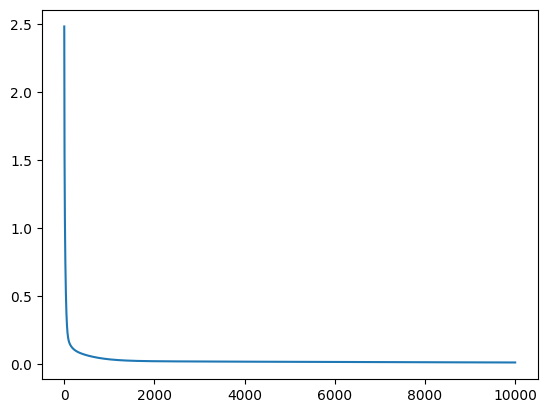

In [9]:
w,history = linear_regression(10000,0.001)
plt.plot(history)

/tmp/ipykernel_33149/3572080188.py:9: RuntimeWarning: overflow encountered in matmul
  return (np.matmul(e.T,e)/n)**0.5
/tmp/ipykernel_33149/1081419864.py:11: RuntimeWarning: overflow encountered in matmul
  gradient =  np.matmul(x.T,error(x,y,w))
/tmp/ipykernel_33149/1081419864.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient =  np.matmul(x.T,error(x,y,w))
/tmp/ipykernel_33149/1081419864.py:12: RuntimeWarning: invalid value encountered in subtract
  w = w - k * gradient


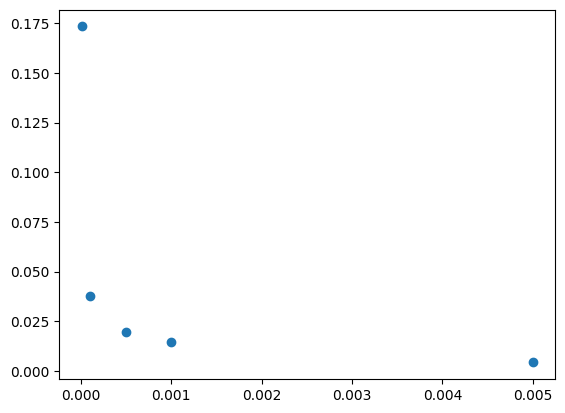

In [10]:
# 1.3.2.3
# try with different learning rates and choose the best one

#Hyperparameters
epochs = 10000

#parameters
ks1 = [0.00001,0.0001,0.0005,0.001,0.005,0.01]

learning_rates_try(ks1)

/tmp/ipykernel_33149/3572080188.py:9: RuntimeWarning: overflow encountered in matmul
  return (np.matmul(e.T,e)/n)**0.5
/tmp/ipykernel_33149/1081419864.py:11: RuntimeWarning: overflow encountered in matmul
  gradient =  np.matmul(x.T,error(x,y,w))
/tmp/ipykernel_33149/1081419864.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient =  np.matmul(x.T,error(x,y,w))
/tmp/ipykernel_33149/1081419864.py:12: RuntimeWarning: invalid value encountered in subtract
  w = w - k * gradient


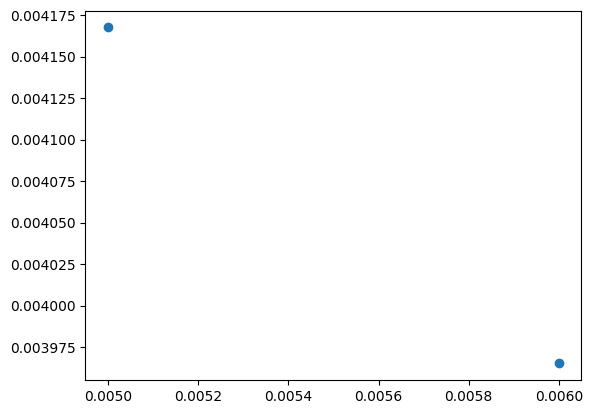

In [11]:
ks2 = [0.005,0.006,0.007,0.008,0.009,0.0095]
learning_rates_try(ks2)

/tmp/ipykernel_33149/3572080188.py:9: RuntimeWarning: overflow encountered in matmul
  return (np.matmul(e.T,e)/n)**0.5
/tmp/ipykernel_33149/1081419864.py:11: RuntimeWarning: overflow encountered in matmul
  gradient =  np.matmul(x.T,error(x,y,w))
/tmp/ipykernel_33149/1081419864.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient =  np.matmul(x.T,error(x,y,w))
/tmp/ipykernel_33149/1081419864.py:12: RuntimeWarning: invalid value encountered in subtract
  w = w - k * gradient


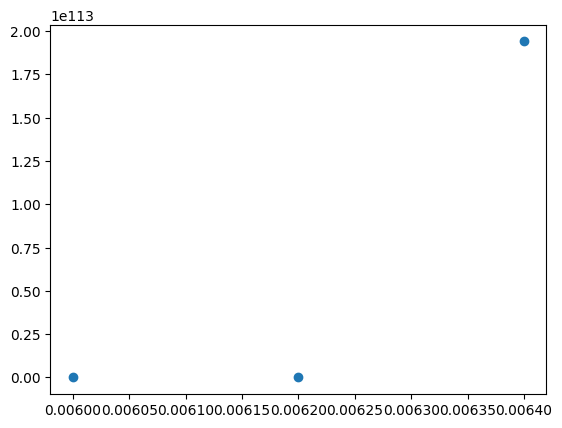

In [12]:
ks3 = [0.006,0.0062,0.0064,0.0066,0.0068]
learning_rates_try(ks3)

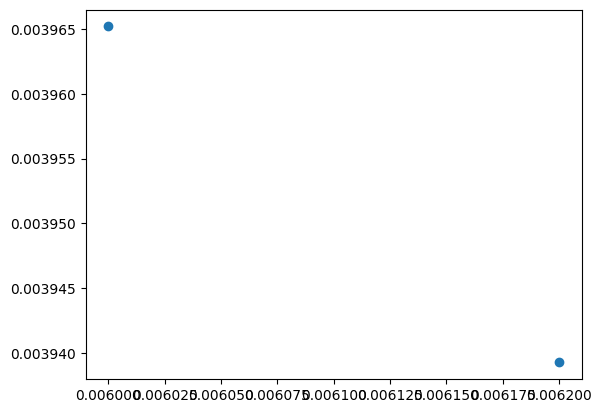

In [13]:
ks4 = [0.006,0.0062]
learning_rates_try(ks4)

best learning rate is 0.0062

In [14]:
w, history = linear_regression(100000,0.0062) 
    

In [15]:
def parity_plot(y_test,y_pred):
    fig, ax = plt.subplots(figsize=(7,7))

    ax.scatter(y_test, y_pred)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    ax.set_title('Parity Plot of Custom Linear Regression')
    ax.set_xlabel('Ground truth y-values')
    ax.set_ylabel('Predicted y-values')
    plt.show()

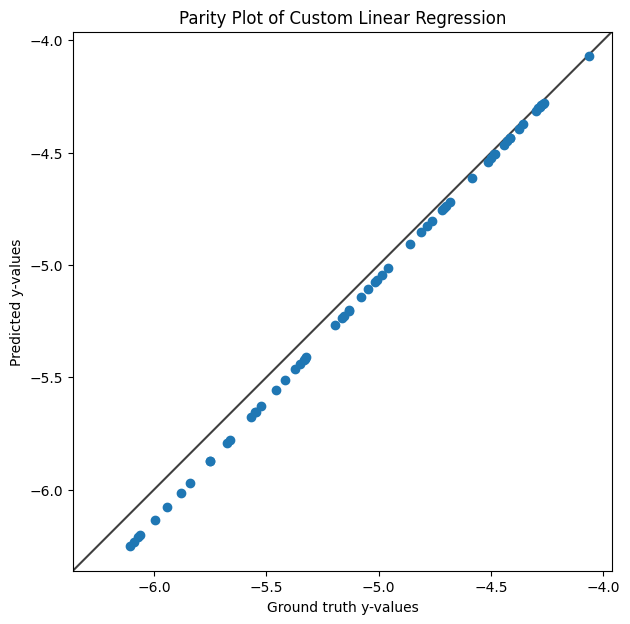

In [16]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`
y_pred = prediction(x_test_b,w)
parity_plot(y_test,y_pred)


In [17]:
rmse(x_test_b,y_test,w,x_test_b.shape[0])

0.07944218461293909

In [18]:
rmse(x,y,w,x.shape[0])

0.0016036215811214211

In [19]:
print(w)

[-0.99894128 -5.01767019  1.3847169  -1.28927692 -1.3021617   0.85284553
 -0.58229574  0.47868417 -0.04672123  0.06482368  0.14585197 -0.09173041
  0.15098255 -0.0917261   0.0858808  -0.03623217  0.01427124  0.01879065
 -0.0348714   0.04933143 -0.05180124  0.04861757 -0.03637685  0.01798271
  0.00733192 -0.03800316]


If we increase the epochs by 10 times, it overfits the training data and testing data rmse error increases

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`

Ridge regression is a regularization technique to prevent overfitting. It uses L2 regularization.

In [20]:
def rmse2(y,y_pred):
    e = y_pred - y 
    return (np.matmul(e.T,e)/y.shape[0])**0.5

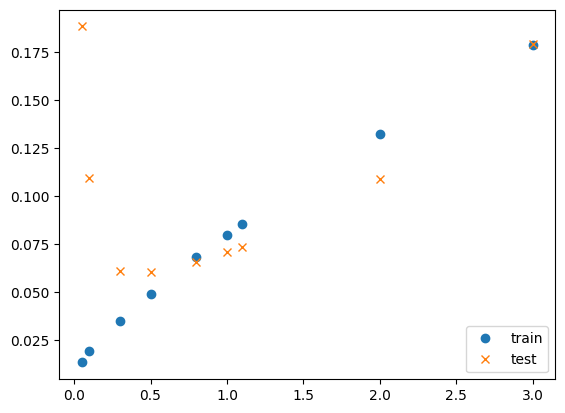

In [21]:
# 1.3.2.2
# you should not have imported sklearn before this point
from sklearn.linear_model import Ridge

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

def ridge_regression(alpha):
    reg = Ridge(alpha = alpha)
    reg.fit(x_train,y)
    y_pred_train = reg.predict(x_train)
    y_pred_test = reg.predict(x_test)
    return y_pred_train,y_pred_test


def try_alphas(alphas):
    rmse_train = []
    rmse_test = []


        
    for alpha in alphas:
        y_pred_train,y_pred_test = ridge_regression(alpha)
        rmse_train.append(rmse2(y,y_pred_train))
        rmse_test.append(rmse2(y_test,y_pred_test))

    plt.plot(alphas,rmse_train,"o")
    plt.plot(alphas,rmse_test,"x")
    plt.legend(["train","test"])

alphas = [0.05,0.1,0.3,0.5,0.8,1,1.1,2,3]

try_alphas(alphas)

    

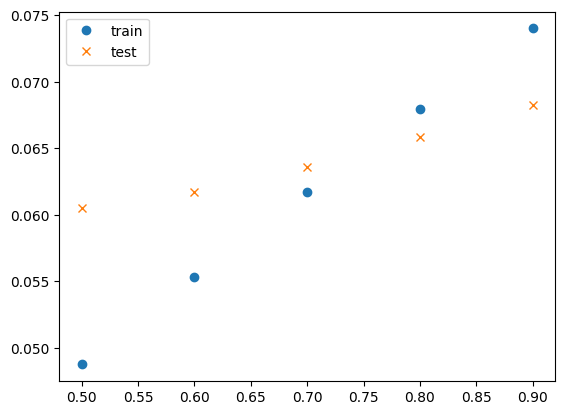

In [22]:
alphas = [0.5,0.6,0.7,0.8,0.9]
try_alphas(alphas)

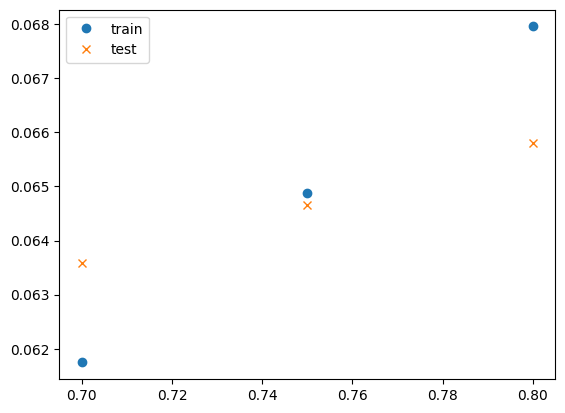

In [23]:
alphas = [0.7,0.75,0.8]
try_alphas(alphas)


In [24]:
y_pred_train,y_pred_test = ridge_regression(0.7)

best `alpha` is 0.7

<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`
paramter `alpha` trade offs the rmse in training test to get lower rmse in test test. As `alpha` increases rmse in train test increases. rmse of test test first increases and then decreases. We will find alpha where both rmse of train and test data is set is lowest. 

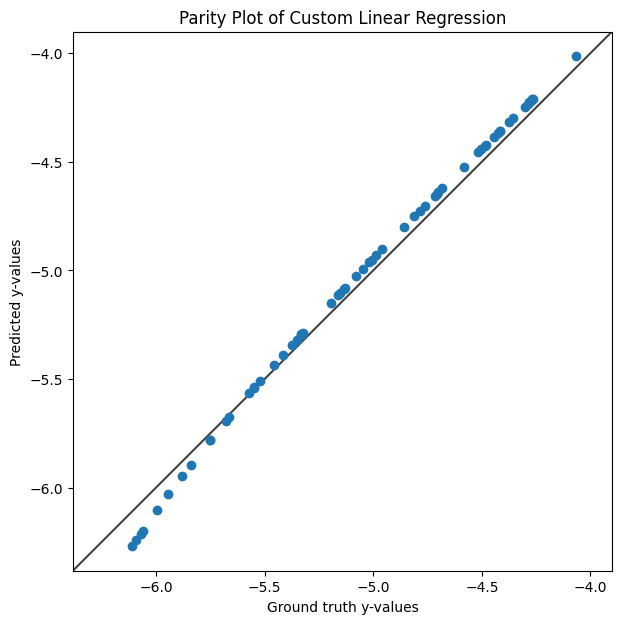

In [25]:
# 1.3.2.4
parity_plot(y_test,y_pred_test)

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`
Ridge regression is a regularization technique to prevent overfitting. It uses L2 regularization.

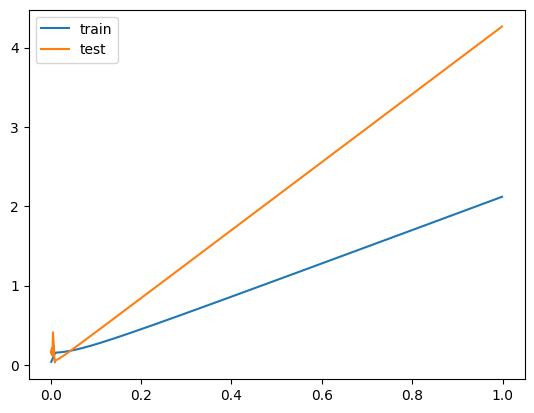

In [26]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn.linear_model import Lasso
def lasso_regression(alpha):
    reg = Lasso(alpha = alpha)
    reg.fit(x_train,y)
    y_pred_train = reg.predict(x_train)
    y_pred_test = reg.predict(x_test)
    return y_pred_train,y_pred_test


def try_alphas(alphas):
    rmse_train = []
    rmse_test = []


        
    for alpha in alphas:
        y_pred_train,y_pred_test = lasso_regression(alpha)
        rmse_train.append(rmse2(y,y_pred_train))
        rmse_test.append(rmse2(y_test,y_pred_test))

    plt.plot(alphas,rmse_train)
    plt.plot(alphas,rmse_test)
    plt.legend(["train","test"])

alphas = np.arange(0.001,1,step=0.001)

try_alphas(alphas)


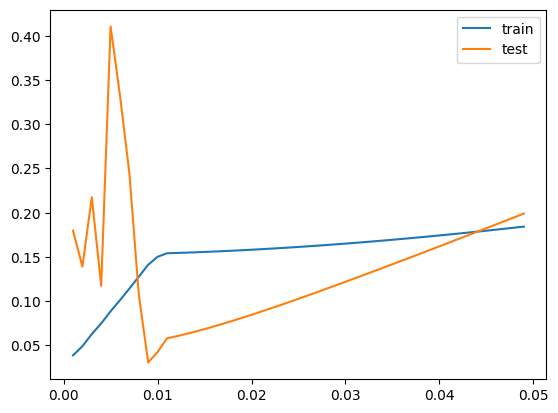

In [27]:
alphas = np.arange(0.001,0.05,step=0.001)
try_alphas(alphas)

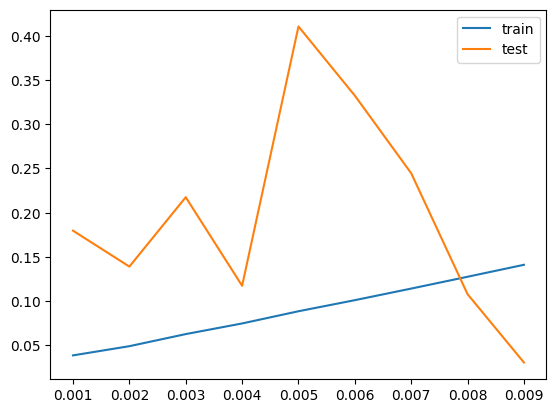

In [28]:
alphas = np.arange(0.001,0.01,step=0.001)
try_alphas(alphas)

In [29]:
y_pred_train,y_pred_test = lasso_regression(0.009)

best alpha is 0.009

<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`
paramter `alpha` trade offs the rmse in training test to get lower rmse in test test. As `alpha` increases rmse in train test increases. rmse of test test first increases and then decreases. We will find alpha where both rmse of train and test data is set is lowest. 

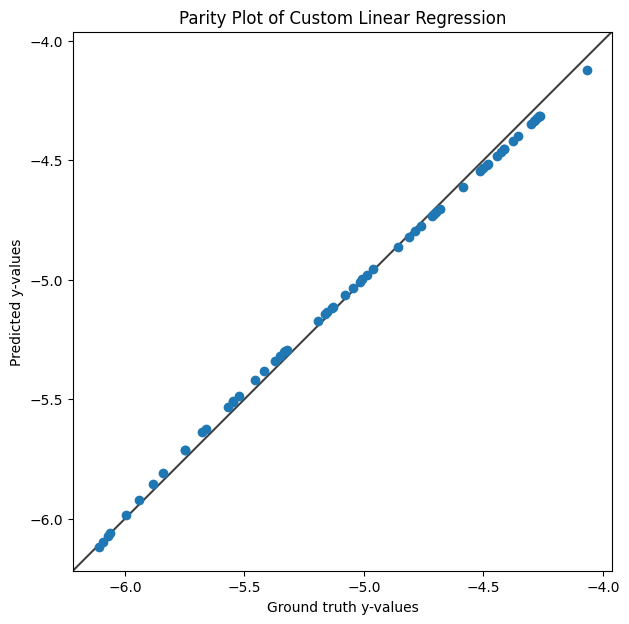

In [30]:
# 1.3.3.4
parity_plot(y_test,y_pred_test)